In [1]:
#Veteran Suicide State wise comparison
#depend
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
file = "veteran_suicides_2005-2011.csv"

In [3]:
#reading vet data from csv  
vet_df = pd.read_csv(file)

#deleting the unnamed column -cleaning 
del vet_df['Unnamed: 0']
vet_df.head()

,state,vet_pop_2005,overall_pop_18_2005,vet_pop_p_2005,vet_suicides_2005,all_suicides_2005,vet_suicides_p_2005,vet_pop_2006,overall_pop_18_2006,vet_pop_p_2006,...,vet_pop_p_2010,vet_suicides_2010,all_suicides_2010,vet_suicides_p_2010,vet_pop_2011,overall_pop_18_2011,vet_pop_p_2011,vet_suicides_2011,all_suicides_2011,vet_suicides_p_2011
0,Alabama,403950,3344721,0.120772,135,535,0.252336,408917,3473558,0.117723,...,0.110360,156,679,0.229750,395753,3662910,0.108043,163,680,0.239706
1,Alaska,74482,446969,0.166638,24,131,0.183206,70067,478581,0.146406,...,0.140705,35,164,0.213415,72407,517799,0.139836,27,142,0.190141
2,Arizona,538880,4238996,0.127124,225,945,0.238095,558906,4521911,0.123600,...,0.111217,240,1093,0.219579,533608,4842927,0.110183,242,1091,0.221815
3,Arkansas,259304,2023819,0.128126,81,400,0.202500,258170,2110583,0.122322,...,0.112340,105,447,0.234899,238790,2221409,0.107495,89,447,0.199105
4,California,2193336,25543447,0.085867,633,3206,0.197442,2142367,26789221,0.079971,...,0.069784,705,3913,0.180169,1910994,28292703,0.067544,706,3923,0.179964


In [4]:
#group by state  
#calculating the mean of vet suicides data for years 2005 to 2011 statewise 
#Suiciderate calculation

vet_suicideratelist = []
nonvet_suicideratelist = []
statelist= []
vetdf = vet_df.set_index('state')

for index,row in vetdf.iterrows():
    
    #Overall population from 2005 to 2011 satewise
    overallpop = (row[1] + row[7]+ row[13] + row[19] +row[25] + row[31] + row[37])
    vetpop = (row[0] + row[6] + row[12] + row[18] + row[24] + row[30] + row[36])
    nonvetpop = (overallpop - vetpop)
    
    overall_suicide = (row[4] + row[10]+ row[16]+ row[22]+row[28]+row[34]+row[40])
    vet_suicide = (row[3] + row[9]+ row[15]+ row[21]+row[27]+row[33]+row[39])
    nonvet_suicide = (overall_suicide - vet_suicide)
    
    vet_suiciderate = round((vet_suicide / vetpop) *100000, 2)
    nonvet_suiciderate = round((nonvet_suicide / nonvetpop) *100000,2)
    
    vet_suicideratelist.append(vet_suiciderate)
    nonvet_suicideratelist.append(nonvet_suiciderate)
    statelist.append(index)

print(vet_suicideratelist)

[37.11, 41.1, 42.55, 36.38, 33.73, 44.27, 18.95, 21.99, 36.78, 26.58, 20.06, 49.31, 25.45, 28.97, 29.21, 37.19, 22.0, 31.17, 30.97, 20.14, 12.17, 31.53, 27.74, 35.73, 35.35, 55.8, 13.83, 50.47, 29.45, 17.47, 47.38, 21.07, 30.46, 37.85, 28.55, 38.39, 43.46, 30.25, 23.09, 32.63, 35.31, 35.18, 30.2, 43.85, 26.78, 25.86, 36.84, 39.42, 32.92, 47.04]


In [5]:
#list to dataframe
new_df = pd.DataFrame({'statelist':statelist, 'vet_suicideratelist':vet_suicideratelist, 'nonvet_suicideratelist' : nonvet_suicideratelist})

#create new df 
new_df = new_df[['statelist', 'vet_suicideratelist','nonvet_suicideratelist']]
new_df.columns

#sort based on value 
new_df1 = new_df.sort_values(by=['vet_suicideratelist'], ascending=False)
new_df1 = new_df1.reset_index(drop=True)
new_df1

,statelist,vet_suicideratelist,nonvet_suicideratelist
0,Montana,55.80,23.96
1,Nevada,50.47,23.30
2,Idaho,49.31,20.08
3,New Mexico,47.38,23.51
4,Wyoming,47.04,25.66
5,Colorado,44.27,20.00
6,Utah,43.85,20.37
7,Oregon,43.46,18.33
8,Arizona,42.55,19.21
9,Alaska,41.10,28.31


In [6]:
file = "VHA_Center.csv"
file2 = '50_usstates_data.csv'

state_df = pd.read_csv(file2)
state_df.head()

vh_df = pd.read_csv(file,  encoding = "ISO-8859-1")


merge_df = pd.merge(state_df, vh_df, how = 'outer', on='state abbreviation')
merge_df.shape

vhacountdf = merge_df.groupby(['state']).count()
vhacount_df = vhacountdf.reset_index()
vhacount_df.columns

vhacount_df
#create new df 
vhasort_df = vhacount_df.sort_values(by= ['Facility'], ascending= False)
vhasort_df = vhasort_df.reset_index(drop= True)
vha_per_state = vhasort_df.drop(vhasort_df.columns[2:], axis=1)
vha_per_state = vha_per_state.sort_values(by="state")
vha_per_state.head()

suicide_data = pd.read_csv("veteran_suicides_2005-2011.csv")
suicide_data["vet_pop_2011"]
vha_per_vet_per_state = np.divide(vha_per_state['statename'], suicide_data["vet_pop_2011"])
vha_per_state['vha_per_vet'] = vha_per_vet_per_state
vha_per_state = vha_per_state.sort_values("vha_per_vet", ascending=False)
# vha_per_state['vha_per_vet'] = vha_per_state['vha_per_vet'].astype(int)
#plt.barh(vha_per_state['state'], vha_per_state['vha_per_vet'])
#plt.show()

In [13]:
vet_suic_rate_ordered_list = new_df1['statelist'].tolist()
vet_suic_rate_ordered_list = vha_per_state.set_index('state').reindex(vet_suic_rate_ordered_list)
vet_suic_rate_ordered_list.head()
new_df1['statelist'].tolist()

['Montana',
 'Nevada',
 'Idaho',
 'New Mexico',
 'Wyoming',
 'Colorado',
 'Utah',
 'Oregon',
 'Arizona',
 'Alaska',
 'West Virginia',
 'Oklahoma',
 'North Dakota**',
 'Kansas',
 'Alabama',
 'Washington',
 'Florida*',
 'Arkansas',
 'Mississippi',
 'Missouri***',
 'South Dakota',
 'Tennessee',
 'California',
 'Wisconsin',
 'South Carolina',
 'Michigan',
 'Louisiana',
 'Maine',
 'North Carolina',
 'Pennsylvania',
 'Texas',
 'New Hampshire',
 'Iowa',
 'Indiana',
 'Ohio',
 'Minnesota',
 'Vermont',
 'Georgia',
 'Virginia',
 'Illinois',
 'Rhode Island',
 'Kentucky',
 'Delaware',
 'New York',
 'Maryland',
 'Hawaii',
 'Connecticut',
 'New Jersey',
 'Nebraska',
 'Massachusetts']

/Users/ucidataanalytics/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


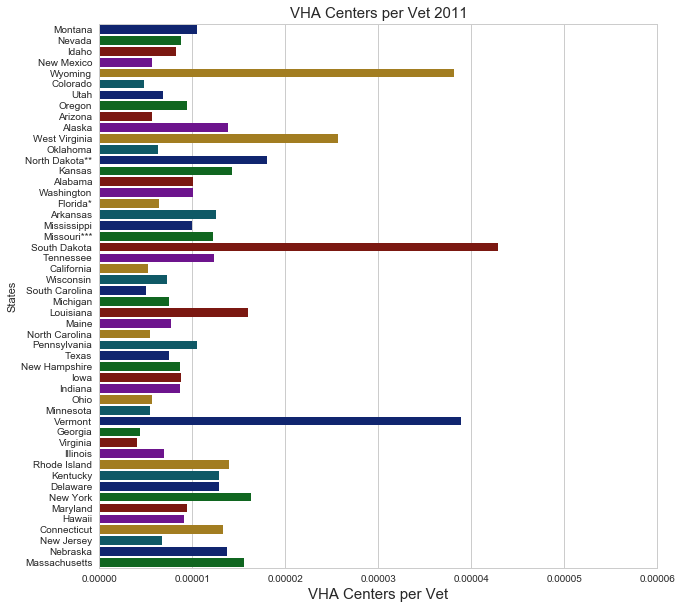

In [16]:
#graph plot State by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = vet_suic_rate_ordered_list.index.values
x_pos = vet_suic_rate_ordered_list['vha_per_vet']

#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="dark")

plt.xlim(0,.00006)
# Plot the crashes where alcohol was involved
#for i, v in enumerate(x_pos):
#    plt.text(v + .5, i , str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("VHA Centers per Vet 2011",fontsize = fontsize)
plt.xlabel("VHA Centers per Vet", fontsize= fontsize)
plt.ylabel("States")
#sns.despine(left=True, bottom=True)
plt.savefig("VHA_center_states")
plt.show() 

/Users/ucidataanalytics/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


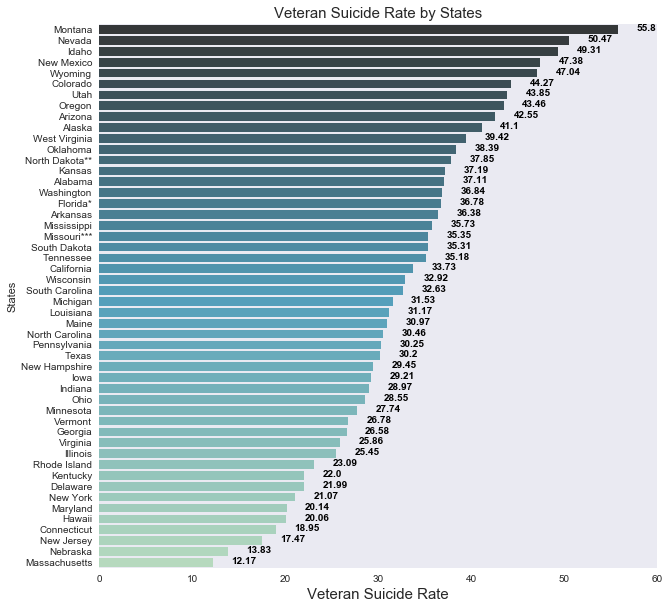

In [9]:
#graph plot State by state comparison of VETERAN suicide
fontsize = 15
sns.set(style="dark")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = new_df1['statelist']
x_pos = new_df1['vet_suicideratelist']

#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,60,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 10)

# Add a legend and informative axis label
plt.title("Veteran Suicide Rate by States",fontsize = fontsize)
plt.xlabel("Veteran Suicide Rate", fontsize= fontsize)
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("Veteran_Sucide_Rate")
plt.show() 

In [10]:
#sort based on value 
new_df2 = new_df[['statelist','nonvet_suicideratelist', 'vet_suicideratelist']]
new_df2 = new_df2.sort_values(by=['nonvet_suicideratelist'], ascending=False)
new_df2

,statelist,nonvet_suicideratelist,vet_suicideratelist
1,Alaska,28.31,41.10
49,Wyoming,25.66,47.04
25,Montana,23.96,55.80
30,New Mexico,23.51,47.38
27,Nevada,23.30,50.47
43,Utah,20.37,43.85
11,Idaho,20.08,49.31
5,Colorado,20.00,44.27
2,Arizona,19.21,42.55
16,Kentucky,18.73,22.00


/Users/ucidataanalytics/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


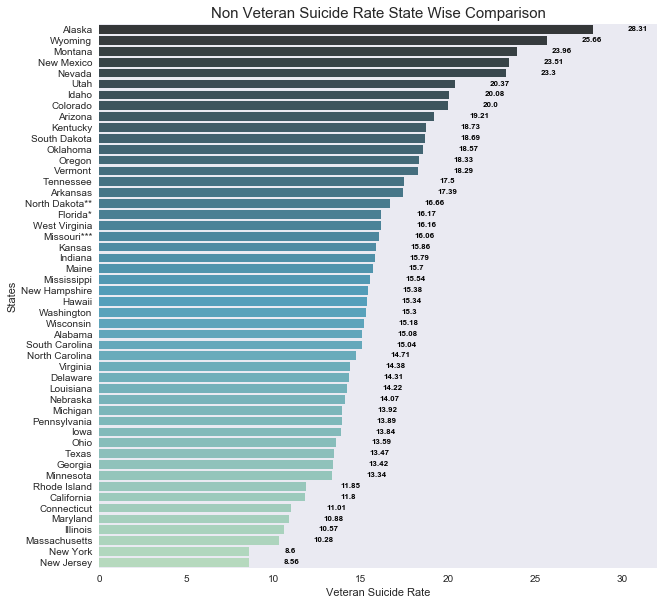

In [11]:
#graph plot State by state comparison of Non VETERAN Suicide 

sns.set(style="dark")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# xposition and y position data 
y_pos = new_df2['statelist']
x_pos =new_df2['nonvet_suicideratelist']


#new_df.set_index('vet_suicideratelist')
#setting the colors
sns.set_color_codes("pastel")
#color = ["#DF0101", "#B40404", "#DF3A01", "#FF8000", "#FAAC58"]
sns.barplot(x_pos, y_pos,
            label="Total", palette="GnBu_d")

plt.xlim(0,32,5)
# Plot the crashes where alcohol was involved
for i, v in enumerate(x_pos):
    plt.text(v + 2, i + .15, str(v), color='black', fontweight='bold', fontsize = 8 )

# Add a legend and informative axis label
plt.title("Non Veteran Suicide Rate State Wise Comparison",fontsize = 15)
plt.xlabel("Veteran Suicide Rate")
plt.ylabel("States")
sns.despine(left=True, bottom=True)
plt.savefig("non_Veteran_Sucide_Rate")
plt.show() 